In [7]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import random
from sklearn import preprocessing

#importing different ML Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


#importing ML evaluation metrics
from sklearn import metrics, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, LeavePOut
from array import array
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score





In [9]:
csvData= pd.read_csv('/content/drive/MyDrive/gender.csv')
csvData

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
75,65,99,no,short,39,yes,green,female
76,61,98,no,short,37,no,brown,female
77,67,119,yes,short,40,no,black,male
78,70,190,yes,medium,43,no,gray,male


In [10]:
csvData.head(10)

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
5,71,190,yes,short,43,no,black,male
6,74,201,yes,bald,44,no,brown,male
7,74,182,no,short,46,no,brown,male
8,63,127,no,short,35,no,green,female
9,65,139,no,medium,37,yes,gray,female


In [11]:
csvData.describe()

,height,weight,shoe_size
count,80.000000,80.000000,80.000000
mean,67.587500,144.787500,40.375000
std,3.883408,33.025764,2.616283
min,58.000000,88.000000,35.000000
25%,65.000000,121.000000,38.000000
50%,68.000000,144.000000,40.000000
75%,71.000000,167.000000,43.000000
max,74.000000,218.000000,46.000000


In [12]:
csvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   height       80 non-null     int64 
 1   weight       80 non-null     int64 
 2   beard        80 non-null     object
 3   hair_length  80 non-null     object
 4   shoe_size    80 non-null     int64 
 5   scarf        80 non-null     object
 6   eye_color    80 non-null     object
 7   gender       80 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.1+ KB


In [13]:
#converting object into numeric
labels = preprocessing.LabelEncoder()
csvData['beard'] = labels.fit_transform(csvData['beard'])
csvData['hair_length'] = labels.fit_transform(csvData['hair_length'])
csvData['scarf'] = labels.fit_transform(csvData['scarf'])
csvData['eye_color'] = labels.fit_transform(csvData['eye_color'])
csvData['gender'] = labels.fit_transform(csvData['gender'])

In [14]:
csvData.head(10)

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,1,3,44,0,0,1
1,68,165,0,0,41,0,0,1
2,62,132,0,2,37,1,1,0
3,65,138,0,1,38,0,3,0
4,70,197,1,2,43,0,3,1
5,71,190,1,3,43,0,0,1
6,74,201,1,0,44,0,2,1
7,74,182,0,3,46,0,2,1
8,63,127,0,3,35,0,4,0
9,65,139,0,2,37,1,3,0


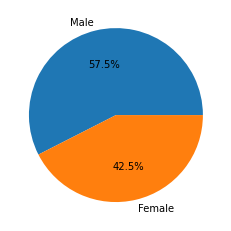

In [15]:
#Ratio of classes
gender = ['Male', 'Female']
female = len(csvData[csvData['gender']== 0])
male = len(csvData[csvData['gender']== 1])
count = [male, female]
plt.pie(count, labels = gender, autopct='%1.1f%%')
plt.show()

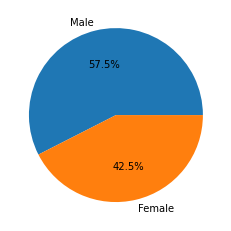

In [16]:
gender = ['Male', 'Female']
female = len(csvData[csvData['gender']== 0])
male = len(csvData[csvData['gender']== 1])
count = [male, female]
plt.pie(count, labels = gender, autopct='%1.1f%%')
plt.show()

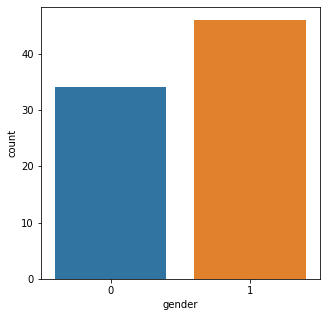

In [17]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(x='gender', data= csvData)

In [22]:
# Train Test Split
csvData.columns.values



array(['height', 'weight', 'beard', 'hair_length', 'shoe_size', 'scarf',
       'eye_color', 'gender'], dtype=object)

In [23]:
#Separating independent features from dependent variable.
X = csvData.drop(['gender'], axis = 1)
y = csvData['gender']

In [24]:
features = X
X

,height,weight,beard,hair_length,shoe_size,scarf,eye_color
0,71,176,1,3,44,0,0
1,68,165,0,0,41,0,0
2,62,132,0,2,37,1,1
3,65,138,0,1,38,0,3
4,70,197,1,2,43,0,3
...,...,...,...,...,...,...,...
75,65,99,0,3,39,1,4
76,61,98,0,3,37,0,2
77,67,119,1,3,40,0,0
78,70,190,1,2,43,0,3


In [25]:
y

0     1
1     1
2     0
3     0
4     1
     ..
75    0
76    0
77    1
78    1
79    0
Name: gender, Length: 80, dtype: int64

In [26]:
#cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state = 2)

In [27]:
X_train.shape

(53, 7)

In [28]:
X_test.shape

(27, 7)

In [29]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

acc_randomforrest = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",acc_randomforrest , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  100.0 %
Confusion matrix:
[[11  0]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



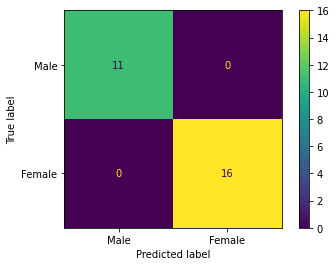

In [30]:
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [31]:
# Support Vector Machines, Linear SVC Classifier

SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, y_train)

y_prediction = SVM.predict(X_test)

acc_SVM = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of LinearSVC Classifier : ",acc_SVM , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of LinearSVC Classifier :  100.0 %
Confusion matrix:
[[11  0]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



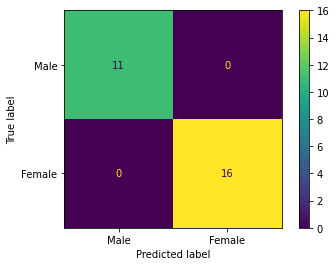

In [32]:
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [34]:
# Multilayer Perceptron Classifier

Multilayer_Perceptron = MLPClassifier()

Multilayer_Perceptron.fit(X_train, y_train)

y_prediction = Multilayer_Perceptron.predict(X_test)

acc_MLPClassifier = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLPClassifier , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)
class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  96.3 %
Confusion matrix:
[[11  0]
 [ 1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        16

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


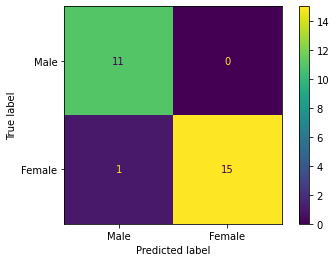

In [35]:
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [36]:
#Applying hold-out cross-validation 80-20(train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 2)

In [37]:
X_train.shape

(64, 7)

In [38]:
X_test.shape

(16, 7)

In [39]:
# Random Forest Classifier

random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

acc_randomforrest = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",acc_randomforrest , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  100.0 %
Confusion matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



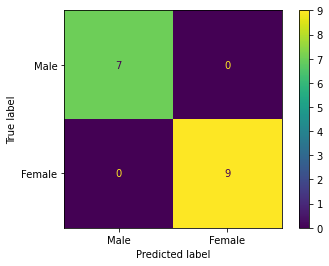

In [40]:
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [41]:
# Support Vector Machines, Linear SVC Classifier

SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, y_train)

y_prediction = SVM.predict(X_test)

acc_SVM = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of SVM Classifier : ",acc_SVM , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of SVM Classifier :  100.0 %
Confusion matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



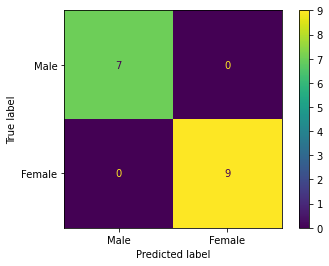

In [42]:
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [43]:
# Multilayer Perceptron Classifier

Multilayer_Perceptron = MLPClassifier()

Multilayer_Perceptron.fit(X_train, y_train)

y_prediction = Multilayer_Perceptron.predict(X_test)

acc_MLPClassifier = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLPClassifier , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  93.75 %
Confusion matrix:
[[7 0]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.89      0.94         9

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


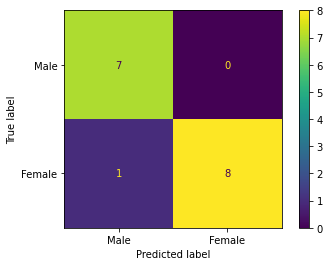

In [44]:
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [45]:
features = X_train.columns
FI = RandomForestClassifier(n_estimators=10)
FI.fit(X_train,y_train)
feature_importance = pd.DataFrame(data={
'Feature': features,
'Importance': FI.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance',ascending=False)

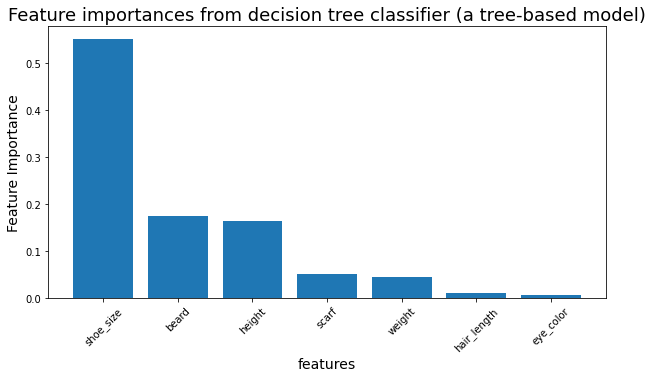

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance']),
plt.title('Feature importances from decision tree classifier (a tree-based model)', size=18)
plt.ylabel("Feature Importance", size=14)

plt.xlabel("features", size=14)

plt.xticks(rotation=45)

plt.show()

In [47]:
X = csvData.drop(['shoe_size', 'beard', 'gender'], axis = 1)
y = csvData['gender']

In [48]:
X

,height,weight,hair_length,scarf,eye_color
0,71,176,3,0,0
1,68,165,0,0,0
2,62,132,2,1,1
3,65,138,1,0,3
4,70,197,2,0,3
...,...,...,...,...,...
75,65,99,3,1,4
76,61,98,3,0,2
77,67,119,3,0,0
78,70,190,2,0,3


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 2)

In [50]:
X_train.shape


(64, 5)

In [51]:
X_test.shape

(16, 5)

In [52]:
# Random Forest Classifier

random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

acc_randomforrest = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",acc_randomforrest , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  87.5 %
Confusion matrix:
[[6 1]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.89      0.89      0.89         9

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16



In [53]:
# Support Vector Machines, Linear SVC Classifier

SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, y_train)

y_prediction = SVM.predict(X_test)

acc_SVM = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of SVM Classifier : ",acc_SVM , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of SVM Classifier :  100.0 %
Confusion matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [54]:
# Multilayer Perceptron Classifier

Multilayer_Perceptron = MLPClassifier()

Multilayer_Perceptron.fit(X_train, y_train)

y_prediction = Multilayer_Perceptron.predict(X_test)

acc_MLPClassifier = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLPClassifier , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  93.75 %
Confusion matrix:
[[7 0]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.89      0.94         9

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
csvData2= pd.read_csv('/content/drive/MyDrive/gender2.csv')

csvData2

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
83,65,99,no,short,39,yes,green,female
84,61,98,no,short,38,no,brown,female
85,67,169,yes,short,40,no,black,male
86,70,150,yes,medium,43,no,red,female


In [60]:
train_data = csvData2.iloc[:80]
train_data

test_data = csvData2.iloc[80:]
test_data

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
80,72,175,yes,medium,44,no,brown,male
81,65,94,no,long,38,yes,gray,#NAME?
82,67,135,no,long,39,yes,green,female
83,65,99,no,short,39,yes,green,female
84,61,98,no,short,38,no,brown,female
85,67,169,yes,short,40,no,black,male
86,70,150,yes,medium,43,no,red,female
87,62,132,yes,long,37,no,blue,female


In [63]:
labels = preprocessing.LabelEncoder()

train_beard_encoded = labels.fit_transform(train_data['beard'])
train_hair_length_encoded = labels.fit_transform(train_data['hair_length'])
train_scarf_encoded = labels.fit_transform(train_data['scarf'])
train_eye_color_encoded = labels.fit_transform(train_data['eye_color'])
X_train = list(zip(train_data['height'], train_data['weight'], train_beard_encoded, train_hair_length_encoded, train_data['shoe_size'], train_scarf_encoded, train_eye_color_encoded))
Y_train = train_data['gender']
test_beard_encoded = labels.fit_transform(test_data['beard'])
test_hair_length_encoded = labels.fit_transform(test_data['hair_length'])
test_scarf_encoded = labels.fit_transform(test_data['scarf'])
test_eye_color_encoded = labels.fit_transform(test_data['eye_color'])
x_test = list(zip(test_data['height'], test_data['weight'], test_beard_encoded, test_hair_length_encoded, test_data['shoe_size'], test_scarf_encoded, test_eye_color_encoded))
y_test = test_data['gender']
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)
GaussianNB()

GaussianNB()

In [66]:
prediction = gnb_model.predict(x_test)
model_acc = accuracy_score(y_test, prediction)*100
model_precision = precision_score(y_test, prediction, average=None).mean() *100
model_recall = recall_score(y_test, prediction, average=None).mean() *100
print("Gaussian Naive Bayes accuracy = ", model_acc, "%")
print("Gaussian Naive Bayes precision = ", model_precision, "%")
print("Gaussian Naive Bayes recall = ", model_recall, "%")

Gaussian Naive Bayes accuracy =  62.5 %
Gaussian Naive Bayes precision =  41.66666666666667 %
Gaussian Naive Bayes recall =  53.333333333333336 %


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
